### Clelia Caetano 2023060 (CA2_SEM2)
### MSc. in Data Analytics
### Project Tweets

In [1]:
# sc master - running locally
sc.master

'local[*]'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the libraries
import os
from pyspark.sql import SparkSession

### Initialize Spark Session

In [4]:
# Create a Spark session with necessary configurations
spark = SparkSession.builder.appName('ProjectTweets') \
                    .config("spark.some_config_option", "config_value") \
                    .getOrCreate()

### Read the Data from csv.

In [5]:
# Load the data and create a temporary view in Spark
try:
    # Load the data.csv file
    data = spark.read.csv("file:///home/hduser/Desktop/CA2_SEM2/ProjectTweets.csv", header=True, inferSchema=True)

    # Check if the data was loaded successfully
    if data is not None:
        # Define column names
        new_column_names = ["number", "id_tweet", "date", "query", "user_id", "tweet"]

        # Use the alias method to rename the columns
        for i in range(len(new_column_names)):
            data = data.withColumnRenamed(data.columns[i], new_column_names[i])

        # Create a temporary table from the DataFrame
        data.createOrReplaceTempView("CA2_ProjectTweets")

        # Run Spark SQL queries using the same SparkSession
        data = spark.sql("SELECT * FROM CA2_ProjectTweets") 

        # Display the first 5 rows
        data.show(5)
    else:
        print("Data not loaded successfully.")

except Exception as e:
    print("An error occurred:", str(e))

+------+----------+--------------------+--------+-------------+--------------------+
|number|  id_tweet|                date|   query|      user_id|               tweet|
+------+----------+--------------------+--------+-------------+--------------------+
|     1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|scotthamilton|is upset that he ...|
|     2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|     mattycus|@Kenichan I dived...|
|     3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|      ElleCTF|my whole body fee...|
|     4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|       Karoli|@nationwideclass ...|
|     5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|     joy_wolf|@Kwesidei not the...|
+------+----------+--------------------+--------+-------------+--------------------+
only showing top 5 rows



### Create a Hive database in Spark application

In [6]:
# Save the DataFrame as a Hive table
data.write.mode("overwrite").saveAsTable("ca2_projecttweets")

2023-10-25 23:34:52,198 WARN conf.HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
2023-10-25 23:34:52,199 WARN conf.HiveConf: HiveConf of name hive.stats.retries.wait does not exist
2023-10-25 23:34:54,898 WARN metastore.ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
2023-10-25 23:34:54,901 WARN metastore.ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by MetaStore hduser@127.0.1.1
2023-10-25 23:34:55,526 WARN metastore.ObjectStore: Failed to get database global_temp, returning NoSuchObjectException
2023-10-25 23:35:02,775 WARN session.SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
2023-10-25 23:35:02,950 WARN conf.HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
2023-10-25 23:3

In [7]:
# Set the current database
spark.sql("USE ca2_projecttweets")

DataFrame[]

In [8]:
# Run a SQL query to select all rows from the table
result = spark.sql("SELECT `number`, `id_tweet`, `date`, `query`, `user_id`, `tweet` FROM ca2_projecttweets")

# Show the first 5 rows
result.show(5)

+------+----------+--------------------+--------+-------------+--------------------+
|number|  id_tweet|                date|   query|      user_id|               tweet|
+------+----------+--------------------+--------+-------------+--------------------+
|     1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|scotthamilton|is upset that he ...|
|     2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|     mattycus|@Kenichan I dived...|
|     3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|      ElleCTF|my whole body fee...|
|     4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|       Karoli|@nationwideclass ...|
|     5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|     joy_wolf|@Kwesidei not the...|
+------+----------+--------------------+--------+-------------+--------------------+
only showing top 5 rows



In [9]:
# Save the preprocessed data as a new table if needed
result.write.mode("overwrite").saveAsTable("preprocessed_ca2_projecttweets")

In [10]:
# Access the Hive table and create a DataFrame
data = spark.table("preprocessed_ca2_projecttweets")

# Print the schema
data.printSchema()

root
 |-- number: integer (nullable = true)
 |-- id_tweet: long (nullable = true)
 |-- date: string (nullable = true)
 |-- query: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- tweet: string (nullable = true)



In [11]:
# Check the size of the data
data_size = data.count()
print(f"The size of the dataset is: {data_size} rows")

The size of the dataset is: 1599999 rows


### Exploratory data analysis (EDA)

In [12]:
# Calculate the number of unique values in each column.
# List of column names
column_names = ["number", "id_tweet", "date", "query", "user_id", "tweet"]

# Dictionary to store unique value counts
unique_counts = {}

# Iterate through the columns and count unique values
for column_name in column_names:
    unique_values = data.select(column_name).distinct()
    unique_count = unique_values.count()
    unique_counts[column_name] = unique_count

# Print the overall count for each column
print("Overall unique value counts:")
for column, count in unique_counts.items():
    print(f"{column}: {count}")

Overall unique value counts:
number: 1599999
id_tweet: 1598314
date: 774362
query: 1
user_id: 659775
tweet: 1581465


In [13]:
# Drop columns that are duplicates and other irrelevant data information.
data = data.drop('number', 'id_tweet', 'query', 'user_id')

# Show the updated DataFrame
data.show(5)

+--------------------+--------------------+
|                date|               tweet|
+--------------------+--------------------+
|Mon Apr 06 22:19:...|is upset that he ...|
|Mon Apr 06 22:19:...|@Kenichan I dived...|
|Mon Apr 06 22:19:...|my whole body fee...|
|Mon Apr 06 22:19:...|@nationwideclass ...|
|Mon Apr 06 22:20:...|@Kwesidei not the...|
+--------------------+--------------------+
only showing top 5 rows



### Missing Values

In [14]:
# Iterate through all columns and print missing value counts
for column_name in data.columns:
    missing_count = data.filter(data[column_name].isNull()).count()
    print(f"Missing values in '{column_name}': {missing_count}")

Missing values in 'date': 0
Missing values in 'tweet': 0


In [15]:
# Print the schema
data.printSchema()

root
 |-- date: string (nullable = true)
 |-- tweet: string (nullable = true)



### Descriptive Statistics

In [16]:
# Compute and interpret the mean, median, quartiles and standard deviation of the dataset
data.describe().show()

+-------+--------------------+--------------------+
|summary|                date|               tweet|
+-------+--------------------+--------------------+
|  count|             1599999|             1599999|
|   mean|                null|                null|
| stddev|                null|                null|
|    min|Fri Apr 17 20:30:...|                 ...|
|    max|Wed May 27 07:27:...|ï¿½ï¿½ï¿½ï¿½ï¿½ß§...|
+-------+--------------------+--------------------+



### Create a configuration to convert string 'date' into timestamp

In [17]:
# Create a SparkSession with the 'spark.sql.legacy.timeParserPolicy' configuration
spark = SparkSession.builder.config("spark.sql.legacy.timeParserPolicy", "LEGACY").getOrCreate()

# Import libraries to convert
from pyspark.sql.functions import from_unixtime, unix_timestamp
from pyspark.sql.types import TimestampType

# Convert 'date' column in string format to the timestamp
data = data.withColumn("date", from_unixtime(unix_timestamp(data["date"], "E MMM dd HH:mm:ss z yyyy")).cast(TimestampType()))

# Print the 'date' column with the new format
data.select("date").show(5)

+-------------------+
|               date|
+-------------------+
|2009-04-07 06:19:49|
|2009-04-07 06:19:53|
|2009-04-07 06:19:57|
|2009-04-07 06:19:57|
|2009-04-07 06:20:00|
+-------------------+
only showing top 5 rows



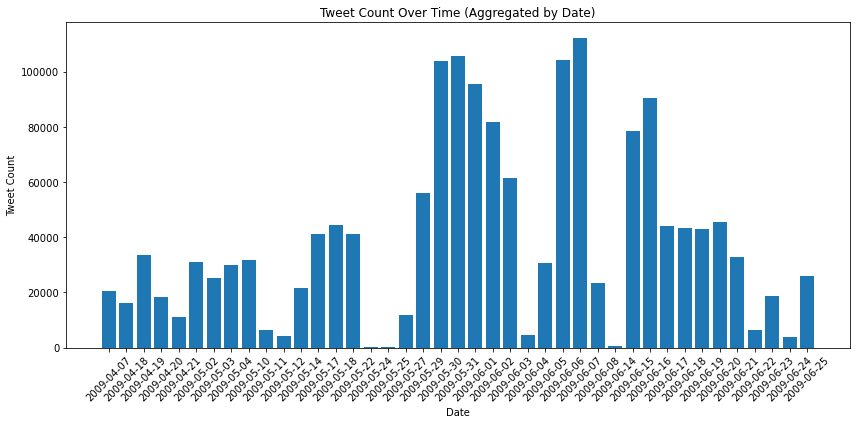

In [18]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, count
from pyspark.sql.window import Window

# Group the data by the date without the hour
data = data.withColumn("date_without_hour", to_date(data["date"]))
date_counts = data.groupBy("date_without_hour").agg(count("*").alias("tweet_count"))

# Sort the data by date without hour
date_counts = date_counts.orderBy("date_without_hour")

# Collect the data to the driver
date_counts = date_counts.collect()

# Extract dates and tweet counts for plotting
dates = [str(row.date_without_hour) for row in date_counts]
tweet_counts = [row.tweet_count for row in date_counts]

# Plot the tweet count
plt.figure(figsize=(12, 6))
plt.bar(dates, tweet_counts)
plt.title("Tweet Count Over Time (Aggregated by Date)")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
from pyspark.sql.functions import col, date_add, datediff
import pyspark.sql.functions as F
from datetime import date, timedelta

# Extract the date part from the 'date' column
data = data.withColumn("date", col("date").cast("date"))

# Sort the DataFrame by date
data = data.orderBy("date")

# Calculate the next date using the lead function
data = data.withColumn("next_date", date_add(col("date"), 1))

# Check if the next date is continuous (no break)
data = data.withColumn("is_continuous", datediff(col("next_date"), col("date")) == 1)

# Create a window specification to order by date
window_spec = Window.orderBy("date")

# Assign a group identifier to continuous sequences
data = data.withColumn("group_id", F.sum(col("is_continuous").cast("int")).over(window_spec))

# Filter only the rows with continuous sequences
continuous_dates = data.filter(col("is_continuous")).select("date").distinct()

# Sort the list in ascending order
continuous_dates = continuous_dates.orderBy("date")

# Get the first and last dates in the DataFrame
first_date = continuous_dates.first().date
last_date = continuous_dates.orderBy(col("date").desc()).first().date

# Print the first and last dates
print("First Date:", first_date)
print("Last Date:", last_date)

# Define the start and end date for the range
start_date = first_date
end_date = last_date

# Generate a list of all dates in the range
date_range = [start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Convert the list of continuous dates to a Python list
continuous_dates_list = [row.date for row in continuous_dates.collect()]

# Find the dates not in the list
missing_dates = [d for d in date_range if d not in continuous_dates_list]

# Print the missing dates
for missing_date in missing_dates:
    print(missing_date)

First Date: 2009-04-07
Last Date: 2009-06-25


2009-04-08
2009-04-09
2009-04-10
2009-04-11
2009-04-12
2009-04-13
2009-04-14
2009-04-15
2009-04-16
2009-04-17
2009-04-22
2009-04-23
2009-04-24
2009-04-25
2009-04-26
2009-04-27
2009-04-28
2009-04-29
2009-04-30
2009-05-01
2009-05-05
2009-05-06
2009-05-07
2009-05-08
2009-05-09
2009-05-13
2009-05-15
2009-05-16
2009-05-19
2009-05-20
2009-05-21
2009-05-23
2009-05-26
2009-05-28
2009-06-09
2009-06-10
2009-06-11
2009-06-12
2009-06-13


### Create a HBase database in Spark application

In [20]:
# Read the data.csv into Hadoop from HDFS (Hadoop Distributed File System) storage
data = spark.read.option("header", "true").csv("hdfs://localhost:9000/user/hduser/CA2/ProjectTweets.csv")

# Check if the data was loaded successfully
if data is not None:
    # Define column names
    new_column_names = ["number", "id_tweet", "date", "query", "user_id", "tweet"]

    # Use the alias method to rename the columns
    for i in range(len(new_column_names)):
        data = data.withColumnRenamed(data.columns[i], new_column_names[i])

In [21]:
# !pip install happybase

In [22]:
import happybase

# Specify the HBase host and port
hbase_host = "localhost"  
hbase_port = 9000  
table_name = 'ProjectTweets'  # Define table name here
column_family = 'cf'  # Define column family name here

In [26]:
# Define a function to insert data into HBase
def insert_into_hbase(row):
    # Define the HBase row key based on the data
    row_key = row['id_tweet']
    
    # Define the data to insert into HBase
    data_dict = {
        f"{column_family}:number": str(row['number']),
        f"{column_family}:date": row['date'],
        f"{column_family}:query": row['query'],
        f"{column_family}:user_id": row['user_id'],
        f"{column_family}:tweet": row['tweet'],
    }
    
    # Access the HBase table
    table = connection.table(table_name)
    
    # Insert the data into HBase
    table.put(row_key.encode(), data_dict)
    
    # Close the connection
    connection.close()

# Use the map transformation to insert data into HBase
data.rdd.map(insert_into_hbase)

# Trigger an action (e.g., count) to execute the transformations
data.rdd.count()

1599999

from pyspark.sql import SparkSession
import happybase

# Initialize Spark
spark = SparkSession.builder.appName("PySparkHBaseExample").getOrCreate()

# Define HBase configuration
hbase_host = "localhost"  # Replace with your HBase host
hbase_port = 9000  # Replace with your HBase Thrift port

# Create an HBase connection
connection = happybase.Connection(hbase_host, port=hbase_port)

# List HBase tables (optional)
tables = connection.tables()
print("HBase Tables: ", tables)

# Select an HBase table
table_name = "ProjectTweets"  # Replace with your table name
table = connection.table(table_name)

# Query data from the HBase table
for key, data in table.scan():
    print("Row Key: ", key)
    print("Data: ", data)

# Close the HBase connection
connection.close()

# Stop Spark
spark.stop()


### Time Series Analysis

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date
from pyspark.sql import functions as F
from pysparkts.models import ARIMA
import matplotlib.pyplot as plt

# Initialize a Spark session
spark = SparkSession.builder.appName("TimeSeriesAnalysis").getOrCreate()

# Load your data from Hive (replace 'your_table' with the actual table name)
data = spark.sql("SELECT date, tweet_count FROM your_table")

# Cast 'date' to a timestamp if it's not already in that format
data = data.withColumn("date", F.to_timestamp(data["date"]))

# Perform time series analysis using pyspark-ts
# For example, let's use ARIMA as an example model
model = ARIMA(maxOrder=(1, 1, 1), seasonalOrder=(0, 1, 1, 7))
fitted_model = model.fit(data, "date", "tweet_count")

# Get the forecasted values
forecast = fitted_model.forecast(data, steps=30)  # Adjust the number of steps as needed

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.select("date").rdd.map(lambda row: row[0]).collect(), data.select("tweet_count").rdd.map(lambda row: row[0]).collect(), label="Actual")
plt.plot(data.select("date").rdd.map(lambda row: row[0]).collect()[-1:], forecast.collect(), label="Forecast")
plt.title("Tweet Count Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()